<a href="https://colab.research.google.com/github/ccbeltran/Curso.Prep.Henry/blob/master/%C3%81rea_bajo_la_curva_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __CURSO DE PROGRAMACIÓN PARA ANALÍTICA DE DATOS - GRUPO 2__

> ## __Estimar el área bajo la curva__
>
> ## Presentado a: Jorge Victorino [jvictorinog@ucentral.edu.co](jvictorinog@ucentral.edu.co)<br>
> ### Facultad de Ingeniería y Ciencias Básicas <br>
> ### Universidad Central <br>
> <br>
>
> ## __Integrantes__

> ##   Cristian Camilo Beltran Montaña
cbeltranm1@ucentral.edu.co
> ##   Miguel Angel Jimenez Bonilla
mjimenezb4@ucentral.edu.co






# __Problema__

Se requiere calcular el valor aproximado del área bajo la curva en el intervalo [a, b] de una
función matemática f(x). El método a utilizar que aproxima el resultado consiste dividir el
intervalo bajo la curva en rectángulos o trapecios del mismo ancho. La altura de los
rectángulos o trapecios estaría dada por la función. Las áreas de cada elemento son
simples de calcular y entonces se suman para obtener una estimación de la integral. Entre
más rectángulos mejor es la aproximación. Para resolver el problema el trabajo tiene las
siguientes partes:

>> __Parte I. Algoritmos para calcular el área.__

Se debe implementar dos métodos para calcular la integral, el primer método con
rectángulos y el segundo con trapecios.

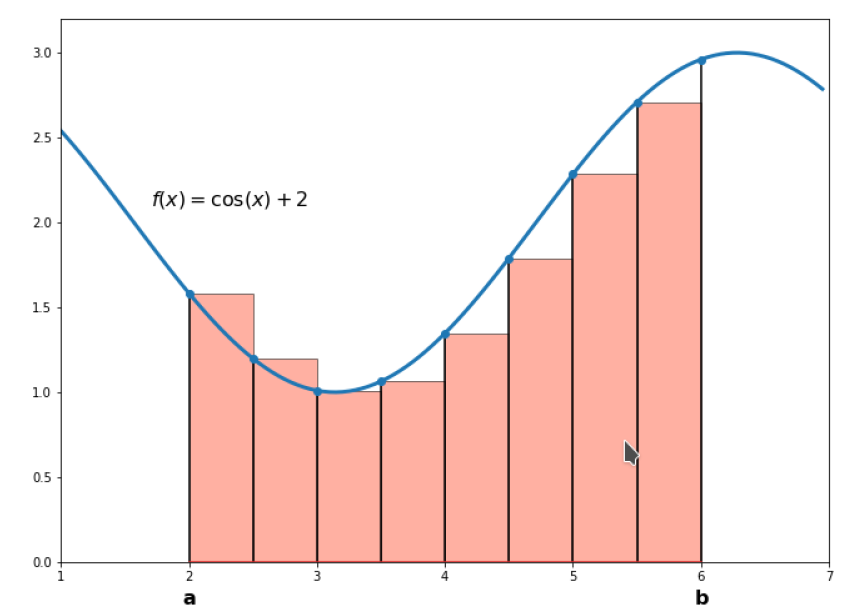

>> __Figura 1.__

Ejemplo de aproximación del área bajo la función f(x) en el intervalo [a,b] dada por
la suma del área de los rectángulos. En este ejemplo el intervalo [a=2, b=6] se divide en 8
rectángulos de un ancho fijo igual a 0.5. Observe que la altura de cada rectángulo es el valor de la función en el vértice superior izquierdo.

---



## __1. Con base en rectángulos:__

El intervalo se divide en n rectángulos del mismo ancho,
y donde la altura está dada por el valor de la función f(x) en el inicio o lado izquierdo
de cada rectángulo, tal se muestra en la figura 1. Posteriormente, se calcula la
integral como el área total que resulta de la suma del área de todos los rectángulos
que conforman el intervalo.


## __2. Cálculo de la integral definida a partir de trapecios:__

Al igual que la técnica
anterior el intervalo se divide en n trapecios del mismo ancho. Las alturas de cada
trapecio al lado izquierdo y derecho está dada por la función f(x). Posteriormente, la
integral o el área bajo la curva se aproxima como el área total que resulta de la suma
de todos los trapecios que conforman el intervalo, tal como se ve en la figura
siguiente:

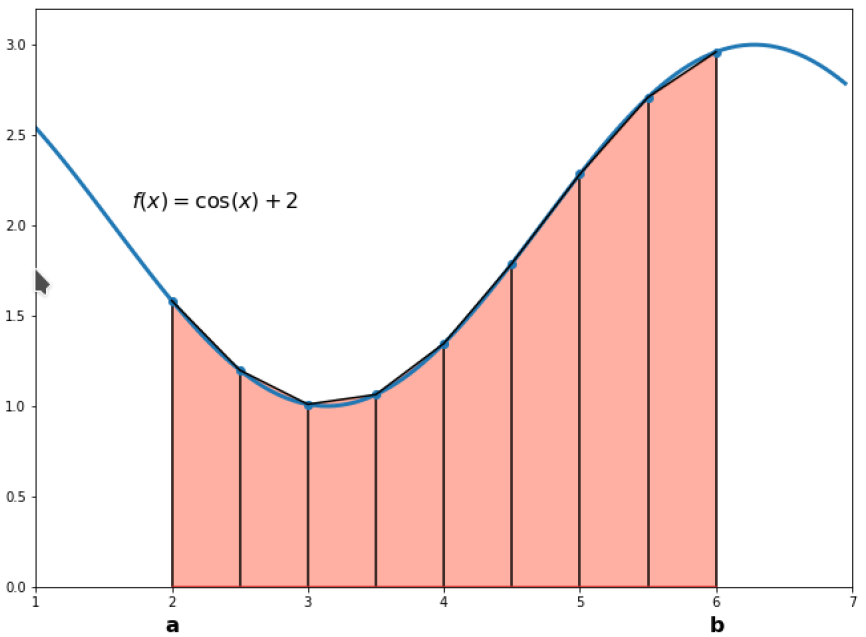

>> __Figura 2.__

Ejemplo de aproximación del área bajo la curva de la función f(x) en el intervalo
[a,b] dada por la suma del área de ocho trapecios. Observe que la altura de cada trapecio
es el valor de la función en los vértices superior izquierdo y superior derecho.







## __Parte I. Algoritmos para calcular el área con el método a utilizar__

1. Colocamos una condición para llamar a la función creada dependiendo si es un rectángulo o un trapecio, sino generamos un error de Método invalido
2. Definimos la función del rectángulo o trapecio según corresponda y se procede a calcular el área
3. Como resultado da el área del rectángulo o trapecio de acuerdo al archivo de entrada con los parámetros establecidos


In [37]:
##   f->La función a integrar.
##   a->Límite inferior del intervalo.
##   b->Límite superior del intervalo.
##   n->Número de rectángulos o trapecios.
##   metodo->Método de integración.

### Colocamos una condición para llamar a la función creada dependiendo si es un rectangulo o un trapecio, sino generamos un error de Método invalido
def calcular_area(f, a, b, metodo, n):
    if metodo == 'rect':
        return rectangulos(f, a, b, n)
    elif metodo == 'trap':
        return trapecio(f, a, b, n)
    else:
        print("Error: Método no válido")
    return None

### definimos la función del rectanculo o trapecio segun corresponda y se procede a calcular el área
def rectangulos(f, a, b, n):
    ancho = (b - a) / n
    area = 0
    x = a

    for i in range(n):
        altura = eval(f)(x)
        area += ancho * altura
        x += ancho
    return area

def trapecio(f, a, b, n):
    ancho = (b - a) / n
    area = 0
    x = a

    for i in range(n):
        altura_izquierda = eval(f)(x)
        x += ancho
        altura_derecha = eval(f)(x)
        area += (ancho / 2) * (altura_izquierda + altura_derecha)
    return area


>> __Parte II. Cálculo de funciones matemáticas.__

En esta parte se definen las funciones matemáticas a las cuales se les va a calcular la
integral, y los límites en donde se define cada función. Todas las funciones están por
encima de cero y por tanto se considera que el área de todos los elementos es mayor que
cero (positiva):

    Función base               Expresión               Intervalo
    1. seno (sen)              F(x) = sen(x) + 1       min = 0, max = 2*pi
    2. coseno (cos)            F(x) = cos(x) + 2       min = 0, max = 2*pi
    3. exponencial (exp)       F(x) = exp(x) - 1       min = 0, max = 8
    4. logaritmo natural (ln)  F(x) = ln(x)            min = 1, max = 20

 La columna intervalo define los límites en los cuales se calcula la función, es decir que los
valores de a y b deben estar dentro del intervalo.

>> __Parte II.A Aproximar funciones con series de Taylor.__

Para hallar un valor de la función en el punto x, no es necesario usar librerías de python.
Dado un valor de x se debe aplicar el método basado en “Serie de Taylor” para hallar F(x)
como se muestra en la siguiente tabla:

${Función seno} \\
sen x = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} \quad \text{para toda } x$


${Función coseno} \\
\cos x = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n} \quad \text{para toda } x$


${Función exponencial} \\
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}$


${Función logaritmo natural} \\
\ln(x) = 2 \sum_{n=0}^{\infty} \frac{1}{2n+1} \left( \frac{x-1}{x+1} \right)^{2n+1}$

En donde el símbolo de admiración ! significa el valor factorial.

## __Parte II. Calculo de las funciones (Seno, Coseno, Exp, Ln)__

1. Se calcula el factorial con el fin de poder calcular las funciones de seno, coseno y exponencial
2. Se procede a calcular las funciones seno, coseno, exp y ln mediante la serie de Taylor
3. Los resultados obtenidos es el valor de X para cada una de las funciones dadas


In [38]:
## Calculamos el factorial de un número n
def factorial(n):
    if n == 0 or n == 1:
        return 1
    elif n > 1:
        return n * factorial(n - 1)



## Calcular seno de x usando la serie de Taylor
def sen(x, terms=120):
    result = 0
    for n in range(terms):
        result += (((-1)**n / factorial(2*n+1)) * x**(2*n+1))
    return result

## Calcula el coseno de x usando la serie de Taylor.
def cos(x, terms=80):
    result = 0
    for n in range(terms):
        result += ((-1)**n * x**(2*n)) / factorial(2*n)
    return result

## Calcular la exponencial de x (e^x) usando la serie de Taylor.
def exp(x, terms=170):
    result = 0
    for n in range(terms):
        result += x**n / factorial(n)
    return result


## Calcular el logaritmo natural de x usando la serie de Taylor.
def ln(x, terms=150):
    result = 0
    for n in range(terms):
        result += (2 * ((1 / (2*n+1)) * (((x-1) / (x+1))*(2*n+1))))
    return result

>> __Parte III.Pruebas de los programas.__

Una parte importante en la implementación de los algoritmos son las pruebas. El trabajo
debe implementar una función que permite ejecutar varias pruebas. La función recibe el
nombre de un archivo de texto como parámetro y devuelve los valores de cada prueba. El
formato del archivo es el siguiente:

● línea 1: valor entero que indica cuántas pruebas hay en el archivo

● línea 2 a línea n+1: n-líneas cada una con cinco valores separados por coma y sin
espacios, los cuales corresponden a una prueba. Los cinco valores son:

a. nombre de la función. Es uno de estos: {sen, cos, exp, ln}

b. valor real que indica el inicio del intervalo [a]

c. valor real que indica el final del intervalo [b]

d. nombre del método para calcular el área. Es uno de estos: {rect, trap}

e. valor entero positivo que indica la cantidad de elementos (rectángulos o
trapecios) en que se divide el intervalo para el cálculo. El valor mínimo es 3 y
el máximo es 2000.


Por ejemplo, el siguiente archivo contiene a la función de integral 8 veces con diferentes
parámetros que son: función, intervalo, método de integración y cantidad de elementos.

    Ejemplo de contenido de un archivo de entrada:
    8
    sen,0.1,1.1,rect,10
    exp,1,3,trap,3
    exp,1,3,trap,2000
    exp,1,8,trap,1000
    ln,1.2,1.5,rect,500
    ln,1.2,1.5,trap,500
    cos,0.1,1.1,rect,10
    cos,0.1,1.1,trap,10

## __Parte III. Pruebas del programa con el archivo txt__

1. Se crea un archivo de prueba en formato txt donde se tiene los parámetros de la función, límite superior (b), límite inferior(a), método (rect y trap) y un valor n que corresponde al número de intervalos o subdivisiones
2. Para cada prueba, lee los parámetros, calcula el área y guarda el resultado
3. Los resultados que se obtienen se imprimen


In [39]:
## Con la función ejecutar pruebas se carga un archivo txt que es el que contiene los datos de prueba con las funciones y métodos, asi como los limites
def ejecutar_pruebas(nombre_archivo):

##Se guardan los resultados en una lista vacia que posteriormente arroja el resultado de los datos cargados en el archivo txt
  resultados = []
  with open(nombre_archivo, 'r') as archivo:
## Lee una línea del archivo y elimina los espacios en blanco, se Divide la línea en partes usando la coma como separador. Esto devuelve una lista con los valores.
      num_pruebas = int(archivo.readline().strip())
      for _ in range(num_pruebas):
          linea = archivo.readline().strip()
          funcion, a, b, metodo, n = linea.split(',')
          a = float(a)
          b = float(b)
          n = int(n)


          print(f"Calcular el área para la función: {funcion}, intervalo: [{a}, {b}], metodo: {metodo}, n: {n}")

          resultado = calcular_area(funcion, a, b, metodo, n)
          #resultados.append(resultado)
          resultados.append((funcion, a, b, metodo, n, resultado))

  return resultados

## se imprime cada resultado
resultados = ejecutar_pruebas('archivo.txt')
for resultado in resultados:
    print(resultado)

Calcular el área para la función: sen, intervalo: [0.1, 1.1], metodo: rect, n: 10
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 3
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 20
Calcular el área para la función: exp, intervalo: [1.0, 8.0], metodo: trap, n: 10
Calcular el área para la función: ln, intervalo: [1.2, 1.5], metodo: rect, n: 50
Calcular el área para la función: ln, intervalo: [1.2, 1.5], metodo: trap, n: 25
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: rect, n: 100
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: trap, n: 100
Calcular el área para la función: cos, intervalo: [0.1, 1.1], metodo: tra, n: 10
Error: Método no válido
Calcular el área para la función: sen, intervalo: [0.1, 1.1], metodo: rect, n: 10
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n: 3
Calcular el área para la función: exp, intervalo: [1.0, 3.0], metodo: trap, n

>> __Parte IV.Gráfica de ejemplo.__

Se debe construir una función que dibuje la gráfica de la función F(x) con los rectángulos o
trapecios de la prueba que se realiza. La gráfica se debe ver similar a como se muestran la
figura 1 y la figura 2 de la parte I. La función de graficar recibe los mismos 5 parámetros de
la función que calcula el área bajo la curva de la función.
En resumen el trabajo debe tener al menos estas funciones:
1. calcular_area (funcion, a, b, metodo, num_elementos)
2. aplicar_pruebas (archivo)
3. generar_grafica (funcion, a, b, metodo, num_elementos)
4. Adicionalmente todas las otras funciones que necesite como son: funciones de
series de taylor para seno, coseno, exponencial y logaritmo, factorial, etc

## __Parte IV. Gráfica de las funciones de archivo txt de prueba__

1. Se importa la librería matplotlib para poder generar los gráficos con los valores de prueba
2. Se define la función generar gráfica con las variables (función, a, b, método, num_elementos)
3. Se crean variables x y y
4. Se gráfica la función siendo el eje x los límite inferior y superior, para el eje e ingresamos la función indicada en el archivo
5. Se comprueba si el método es rect o trap, en caso de ser alguno de los dos se gráfica las correspondientes líneas
6. Muestra la gráfica de acuerdo con los parámetros que estén en el archivo de prueba txt


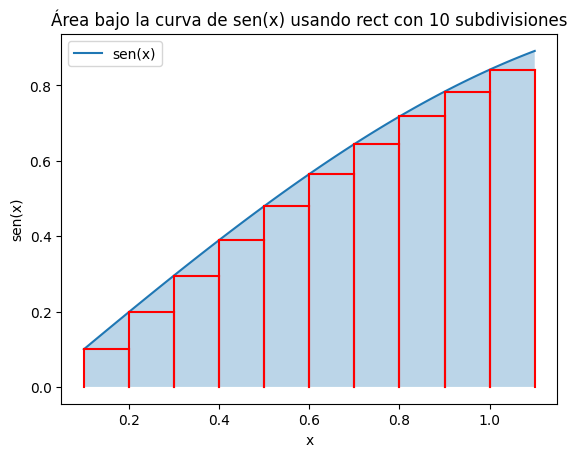

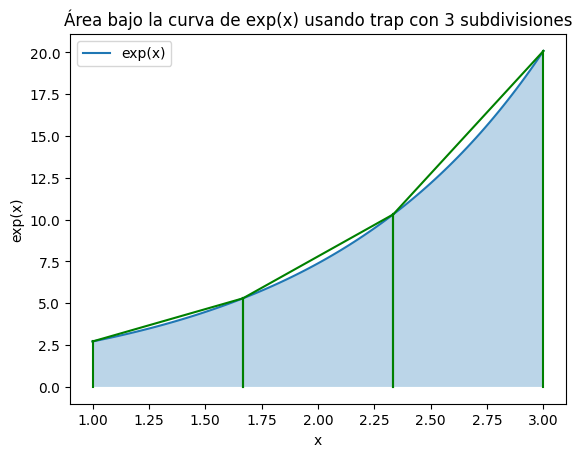

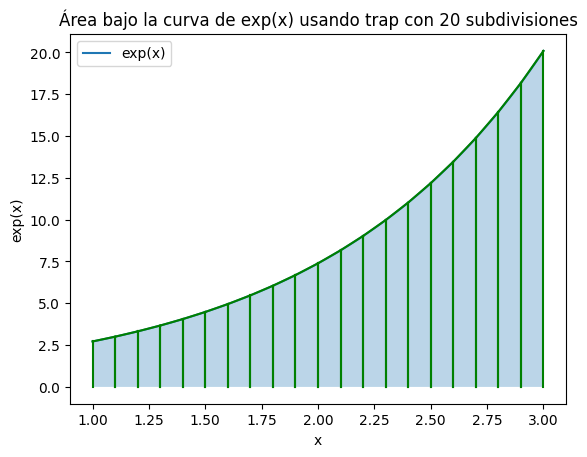

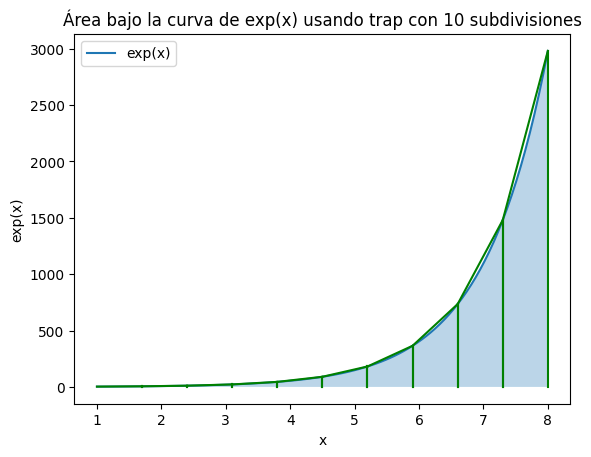

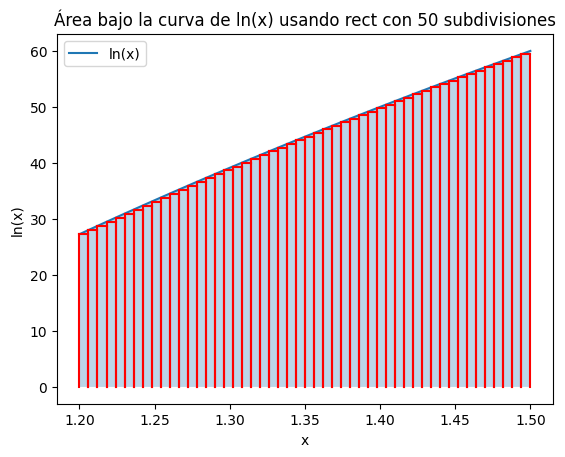

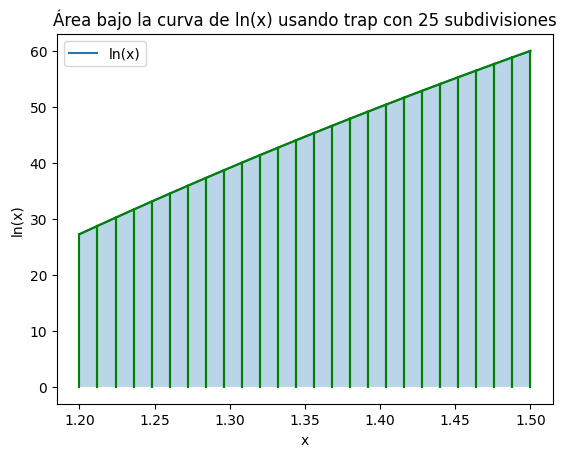

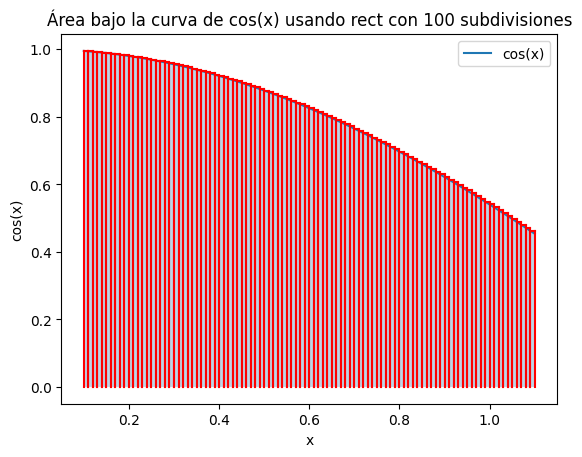

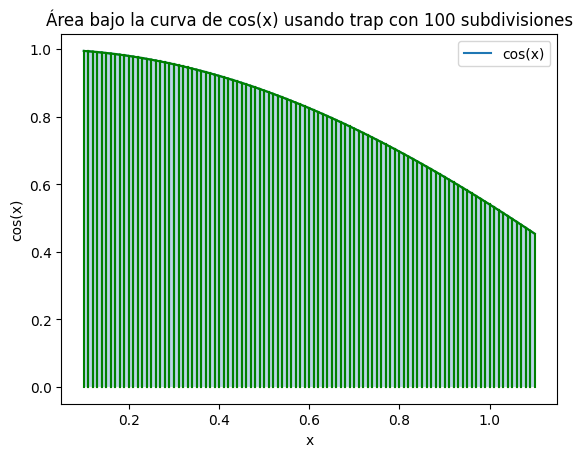

Error: Método no válido


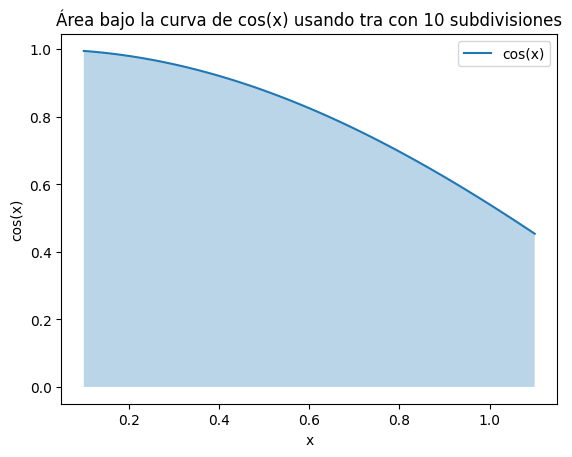

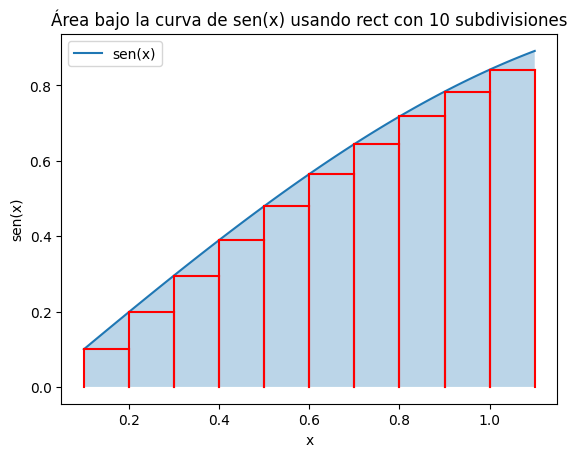

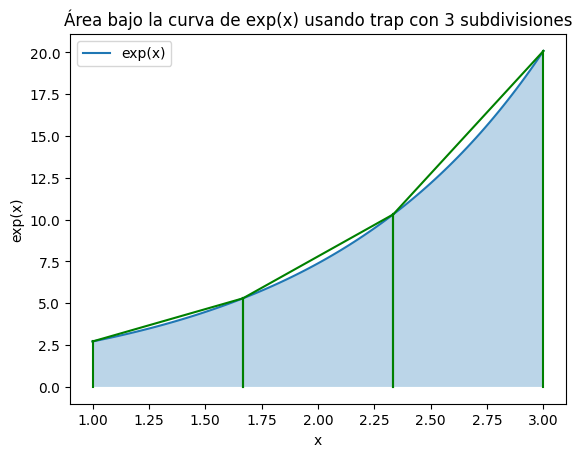

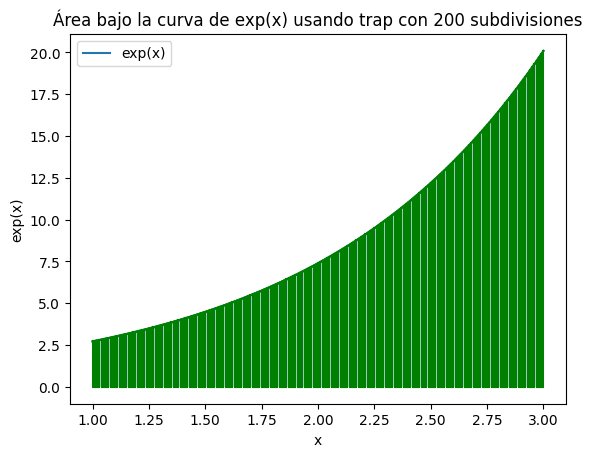

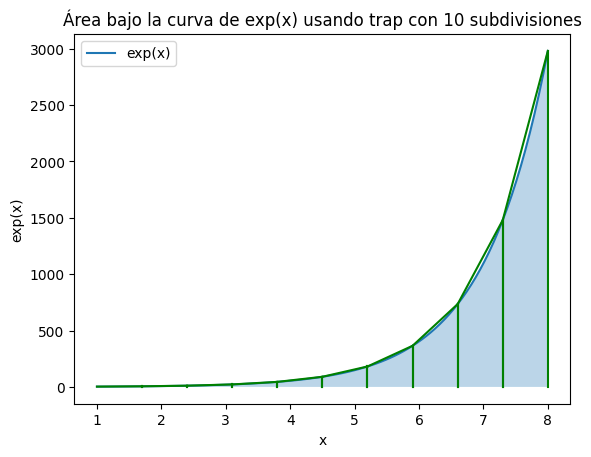

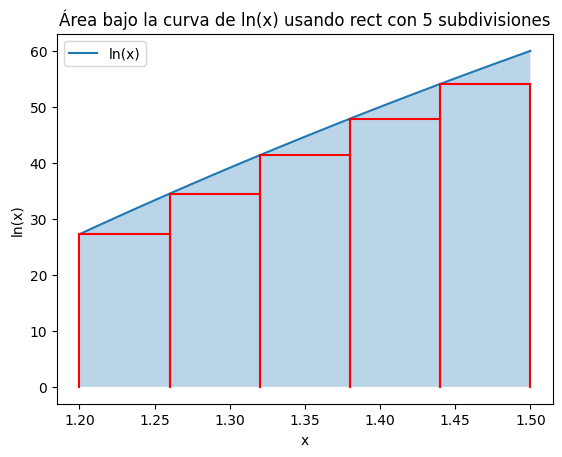

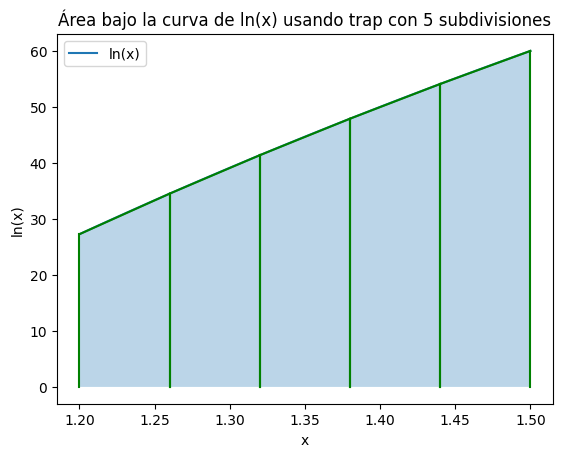

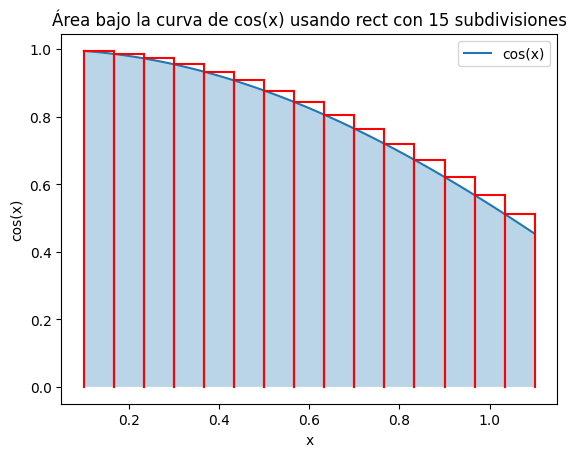

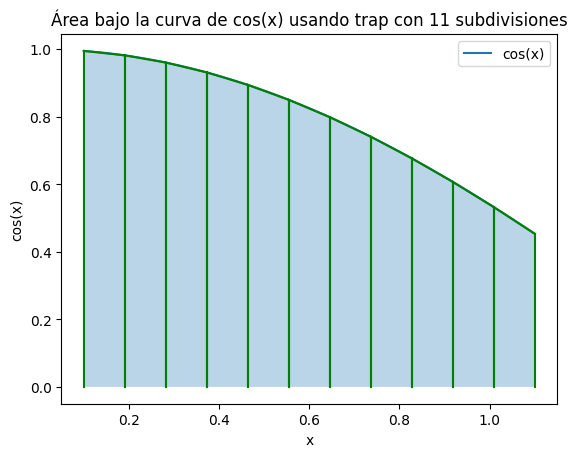

In [40]:
import matplotlib.pyplot as plt
def generar_grafica(funcion, a, b, metodo, num_elementos):
    area = calcular_area(funcion, a, b, metodo, num_elementos)

    # Generar valores de x - y para la gráfica
    x_values = [a + i * (b - a) / 100 for i in range(101)]
    y_values = [eval(funcion)(x) for x in x_values]

    # Graficar la función y el área bajo la curva
    plt.plot(x_values, y_values, label=f'{funcion}(x)')
    plt.fill_between(x_values, y_values, where=[a <= x <= b for x in x_values], alpha=0.3)

    # Graficar rectángulos o trapecios según el método
    if metodo == 'rect':
        for i in range(num_elementos):
            x0 = a + i * (b - a) / num_elementos
            x1 = a + (i + 1) * (b - a) / num_elementos
            plt.plot([x0, x0], [0, eval(funcion)(x0)], 'r-')
            plt.plot([x1, x1], [0, eval(funcion)(x0)], 'r-')
            plt.plot([x0, x1], [eval(funcion)(x0), eval(funcion)(x0)], 'r-')
    elif metodo == 'trap':
        for i in range(num_elementos):
            x0 = a + i * (b - a) / num_elementos
            x1 = a + (i + 1) * (b - a) / num_elementos
            plt.plot([x0, x0], [0, eval(funcion)(x0)], 'g-')
            plt.plot([x1, x1], [0, eval(funcion)(x1)], 'g-')
            plt.plot([x0, x1], [eval(funcion)(x0), eval(funcion)(x1)], 'g-')

    plt.title(f'Área bajo la curva de {funcion}(x) usando {metodo} con {num_elementos} subdivisiones')
    plt.xlabel('x')
    plt.ylabel(f'{funcion}(x)')
    plt.legend()
    plt.show()

# Ejecución de pruebas y generación de gráficas.
# resultados = ejecutar_pruebas('archivo.txt')
# for resultado in resultados:
#     print(resultado)

for resultado in resultados:
    funcion, a, b, metodo, n, _ = resultado
    generar_grafica(funcion.strip(), a, b, metodo.strip(),n)